# Basic Chemostat Model

#TODO add schematic of chemostat model
#from IPython.display import Image
#Image(filename=('NPZDslab_schematics.png'), width=500)

In [1]:
import numpy as np
# to check for array handling errors:
np.warnings.filterwarnings('error', category=np.VisibleDeprecationWarning)

import matplotlib.pyplot as plt

In [2]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

In [3]:
import XSO

ModuleNotFoundError: No module named 'XSO'

In [426]:
from phydra.components.variables import SV

from phydra.components.fluxes.basic import LinearDecay, LinearExchange, LinearDecay_ListInput
from phydra.components.fluxes.basic_forcing import LinearForcingInput
from phydra.components.fluxes.growth import MonodGrowth

from phydra.components.forcings import ConstantForcing, SinusoidalForcing

In [427]:
NPChemostat = phydra.create({
    # State variables
    'Nutrient':SV,
    'Phytoplankton':SV,
    
    # Flows:
    'Inflow':LinearForcingInput,
    'Outflow':LinearDecay_ListInput,

    # Growth
    'Growth':MonodGrowth,
    
    # Mortality 
    #'PhytoLinMortality':LinearDecay,
    #'PhytoExcretion':LinearExchange,

    # Forcings
    'N0':ConstantForcing
                     })

In [428]:
NPChemostat

<xsimlab.Model (9 processes, 16 inputs)>
Core
    solver_type       [in]
Time
    time              [in] ('input_time',) sequence of time points ...
Nutrient
    var_label         [in] label / basic state variable
    var_init          [in] initial value / basic state variable
Phytoplankton
    var_label         [in] label / basic state variable
    var_init          [in] initial value / basic state variable
N0
    forcing_label     [in] label / 
    value             [in] constant value of forcing
Inflow
    var               [in] label reference / variable affected by flux
    forcing           [in] label reference / forcing affecting flux
    rate              [in] linear rate of change
Outflow
    var_list          [in] ('decay_vars',) label reference / list o...
    rate              [in] linear rate of decay/mortality
Growth
    resource          [in] label reference / 
    consumer          [in] label reference / 
    halfsat           [in] half-saturation constant
Solver

In [429]:
#NPChemostat.visualize(show_inputs=True)

In [437]:
chemostat_setup = phydra.setup(solver='stepwise', model=NPChemostat,
            time=np.arange(0,100),
            input_vars={
                    # State variables
                    'Nutrient':{'var_label':'N','var_init':1.},
                    'Phytoplankton':{'var_label':'P','var_init':0.01},
                
                    # Flows:
                    'Inflow':{'forcing':'N0', 'rate':0.1, 'var':'N'},
                    'Outflow':{'var_list':['N', 'P'], 'rate':0.1},
                
                    # Growth
                    'Growth':{'resource':'N', 'consumer':'P', 'halfsat':("hello",[0.7, 0.6, 0.5])},
                
                    # Mortality 
                    #'PhytoLinMortality':{'var':'P', 'rate':0.05},
                    #'PhytoExcretion':{'source':'P', 'sink':'N', 'rate':0.05},

                    # Forcings
                    'N0':{'forcing_label':'N0', 'value':1.}
            })

In [432]:
chemostat_setup.reset_coords()

<xarray.Dataset>
Dimensions:                   (clock: 100, decay_vars: 2, input_time: 100)
Coordinates:
  * clock                     (clock) int64 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
Dimensions without coordinates: decay_vars, input_time
Data variables:
    Nutrient__var_label       <U1 'N'
    Nutrient__var_init        float64 1.0
    Phytoplankton__var_label  <U1 'P'
    Phytoplankton__var_init   float64 0.01
    Inflow__forcing           <U2 'N0'
    Inflow__rate              float64 0.1
    Inflow__var               <U1 'N'
    Outflow__var_list         (decay_vars) <U1 'N' 'P'
    Outflow__rate             float64 0.1
    Growth__resource          <U1 'N'
    Growth__consumer          <U1 'P'
    Growth__halfsat           float64 0.7
    N0__forcing_label         <U2 'N0'
    N0__value                 float64 1.0
    Core__solver_type         <U8 'stepwise'
    Time__time                (input_time) int64 0 1 2 3 4 5 ... 95 96 97 98 99
Attributes:
    __xsimlab_output_vars__:  Nutrient__var_value,Phytoplankton__var_value,In...

In [433]:
import zarr

In [438]:
with NPChemostat:
    chemostat_out = chemostat_setup.xsimlab.run(batch_dim="hello", parallel=True)

initializing model backendinitializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component N0
forcing function is in directory: /Users/bpo/Documents/GitHub/phydra/examples
forcing_val: 
1.0
Initializing component Inflow
Initializing component Outflow
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.StepwiseSolver object at 0x16994ff40>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P'] 
Parameters:['N0_value', 'Inflow_rate', 'Outflow_rate', 'Growth_halfsat'] 
Forcings:['N0'] 
Fluxes:['Time_time_flux', 'Inflow_input', 'Outflow_decay', 'Growth_uptake'] 
Full Model Dimensions:[('time', None), ('N', None), ('P', None), ('Time_time_flux', None), ('Inflow_input', None), ('Outflow_decay', 2), ('Growth_uptake', None)] 

Initializing Model Timeinitializing model backend

Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializi

In [439]:
chemostat_out.Phytoplankton__var_value

<xarray.DataArray 'Phytoplankton__var_value' (hello: 3, time: 100)>
array([[0.01      , 0.01488235, 0.02212717, 0.03285462, 0.04868886,
        0.07195104, 0.10588253, 0.15483674, 0.22426112, 0.3200298 ,
        0.44617363, 0.59932596, 0.75864725, 0.87897904, 0.9229583 ,
        0.9246121 , 0.92425785, 0.92406251, 0.92387795, 0.92371245,
        0.92356345, 0.92342935, 0.92330865, 0.92320003, 0.92310226,
        0.92301426, 0.92293507, 0.92286379, 0.92279964, 0.9227419 ,
        0.92268994, 0.92264317, 0.92260107, 0.92256319, 0.9225291 ,
        0.92249841, 0.92247079, 0.92244594, 0.92242356, 0.92240343,
        0.92238531, 0.922369  , 0.92235432, 0.92234111, 0.92232923,
        0.92231853, 0.92230889, 0.92230023, 0.92229243, 0.92228541,
        0.92227909, 0.9222734 , 0.92226828, 0.92226368, 0.92225953,
        0.9222558 , 0.92225244, 0.92224942, 0.9222467 , 0.92224425,
        0.92224205, 0.92224007, 0.92223828, 0.92223668, 0.92223523,
        0.92223393, 0.92223276, 0.92223171, 0.92223076, 0.9222299 ,
        0.92222914, 0.92222844, 0.92222782, 0.92222726, 0.92222676,
        0.9222263 , 0.9222259 , 0.92222553, 0.9222252 , 0.9222249 ,
        0.92222463, 0.92222439, 0.92222417, 0.92222398, 0.9222238 ,
        0.92222365, 0.9222235 , 0.92222338, 0.92222326, 0.92222316,
        0.92222306, 0.92222298, 0.9222229 , 0.92222283, 0.92222277,
        0.92222272, 0.92222267, 0.92222262, 0.92222258, 0.92222255],
...
       [0.01      , 0.01566667, 0.02452113, 0.03832597, 0.0597741 ,
        0.09291326, 0.14365698, 0.22019749, 0.33266762, 0.49010147,
        0.68947123, 0.8864953 , 0.96553328, 0.93599338, 0.95233863,
        0.94360079, 0.94801469, 0.94536923, 0.94650551, 0.94564579,
        0.94587476, 0.94554587, 0.94553478, 0.94537305, 0.94530825,
        0.94520695, 0.94513864, 0.94506501, 0.94500519, 0.94494793,
        0.94489822, 0.94485251, 0.94481188, 0.94477504, 0.94474203,
        0.94471225, 0.94468548, 0.94466137, 0.94463968, 0.94462016,
        0.94460259, 0.94458677, 0.94457254, 0.94455973, 0.9445482 ,
        0.94453783, 0.94452849, 0.94452008, 0.94451252, 0.94450571,
        0.94449959, 0.94449407, 0.94448911, 0.94448464, 0.94448062,
        0.94447701, 0.94447375, 0.94447082, 0.94446818, 0.94446581,
        0.94446367, 0.94446175, 0.94446002, 0.94445846, 0.94445706,
        0.9444558 , 0.94445466, 0.94445364, 0.94445272, 0.94445189,
        0.94445115, 0.94445048, 0.94444987, 0.94444933, 0.94444884,
        0.9444484 , 0.94444801, 0.94444765, 0.94444733, 0.94444704,
        0.94444678, 0.94444655, 0.94444634, 0.94444615, 0.94444598,
        0.94444582, 0.94444569, 0.94444556, 0.94444545, 0.94444535,
        0.94444526, 0.94444518, 0.9444451 , 0.94444504, 0.94444498,
        0.94444493, 0.94444488, 0.94444483, 0.9444448 , 0.94444476]])
Dimensions without coordinates: hello, time
Attributes:
    Phydra_store_out:  True
    description:       output of variable value / basic state variable

(0.0, 1.0495)

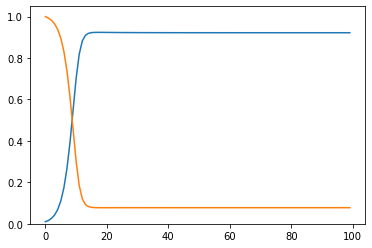

In [369]:
time = chemostat_out.Time__time
plt.plot(time, chemostat_out.Phytoplankton__var_value)
plt.plot(time, chemostat_out.Nutrient__var_value)
plt.ylim(bottom=0)

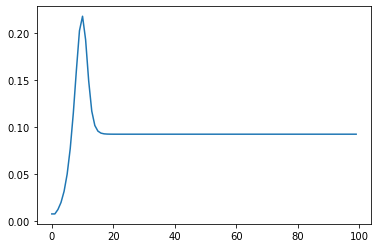

In [370]:
plt.plot(time, chemostat_out.Growth__uptake_value)

In [371]:
## now add sinusoidal forcing:
NPChemostat_sinu = NPChemostat.update_processes({'N0':SinusoidalForcing})

with NPChemostat_sinu:
    chemostat_setup_sinu = chemostat_setup.xsimlab.update_vars(input_vars={'N0':{'forcing_label':'N0', 'period':24}})
    chemostat_out_sinu = chemostat_setup_sinu.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component N0
forcing function is in directory: /Users/bpo/Documents/GitHub/phydra/examples
Initializing component Inflow
Initializing component Outflow
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.ODEINTSolver object at 0x1689b8280>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P'] 
Parameters:['N0_period', 'Inflow_rate', 'Outflow_rate', 'Growth_halfsat'] 
Forcings:['N0'] 
Fluxes:['Time_time_flux', 'Inflow_input', 'Outflow_decay', 'Growth_uptake'] 
Full Model Dimensions:[('time', None), ('N', None), ('P', None), ('Time_time_flux', None), ('Inflow_input', None), ('Outflow_decay', 2), ('Growth_uptake', None)] 

finalizing: cleanup
Model was solved in 0.12844 seconds


(0.0, 1.3348553604614397)

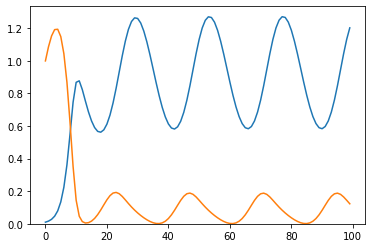

In [372]:
time = chemostat_out.Time__time
plt.plot(time, chemostat_out_sinu.Phytoplankton__var_value)
plt.plot(time, chemostat_out_sinu.Nutrient__var_value)
plt.ylim(bottom=0)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

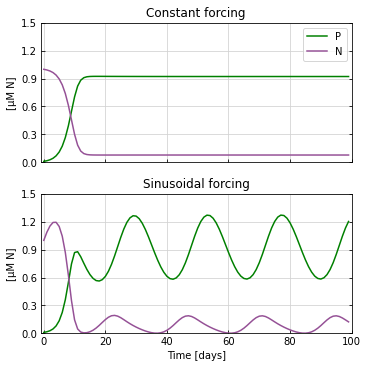

In [387]:
# Pub Plot Draft
%matplotlib inline


culr=['#955196','green','darkorange','brown']

plt.rcParams['figure.figsize'] = [5, 5]

numcols = 1
f1, ax1 = plt.subplots(2, numcols, sharex='col', constrained_layout=True)  #, sharey='row')

plt.setp((ax1, ))  # , xticks=[1,60,120,180,240,300,365]
from matplotlib.ticker import MaxNLocator
for axe in (ax1,):
    for i in range(2):
        
        axe[i].grid(True, color='lightgrey')
        axe[i].get_yaxis().set_major_locator(MaxNLocator(nbins=5))
        axe[i].tick_params(top=False, right=True, direction="in")

time = chemostat_out.Time__time
ax1[0].set_title('Constant forcing')
#ax1[0].annotate('Monod',xy=(0, 0.6),rotation=90,xytext=(-30,.75), size='x-large', verticalalignment='center')
ax1[0].plot(time, chemostat_out.Phytoplankton__var_value, label='P', c=culr[1])
ax1[0].plot(time, chemostat_out.Nutrient__var_value, label='N', c=culr[0])
ax1[0].set_ylabel('[µM N]')

time = chemostat_out_sinu.Time__time
ax1[1].set_title('Sinusoidal forcing')
ax1[1].plot(time, chemostat_out_sinu.Phytoplankton__var_value, label='P', c=culr[1])
ax1[1].plot(time, chemostat_out_sinu.Nutrient__var_value, label='N', c=culr[0])


ax1[0].set_ylabel('[µM N]')
ax1[1].set_ylabel('[µM N]')

ax1[1].set_xlabel('Time [days]')


# Defining custom 'xlim' and 'ylim' values.
xlim = (-1, 100)

# Setting the values for all axes.
plt.setp((ax1,), xlim=xlim, ylim=(0,1.5))

f1.align_ylabels()

for axe in (ax1,):
    for i in range(1):
        axe[i].legend()#fontsize='small')

#ax1[1].set_yticklabels([])
#ax2[1].set_yticklabels([])
        
#plt.tight_layout()

#plt.subplots_adjust(hspace=0.1, wspace=0.1)

plt.savefig('NP_Chemostat.pdf', bbox_inches='tight')
plt.show()

# NP Chemostat with Droop Quota

In [15]:
@phydra.comp(init_stage=2)
class Droop_Phyto_SV:
    """represents a state variable in the model"""

    var = phydra.variable(description='basic state variable')
    
    quota = phydra.variable(description='sv quota')
    

@phydra.comp
class DroopGrowth:
    resource = phydra.variable(foreign=True, flux='uptake', negative=True)
    consumer = phydra.variable(foreign=True, flux='growth')  # dims='var',
    consumer_quota = phydra.variable(foreign=True, flux=['uptake', 'growth'], negative=[False, True])
    
    min_quota = phydra.parameter(description='minimum quota')
    max_quota = phydra.parameter(description='maximum quota')
    halfsat = phydra.parameter(description='half-saturation constant')  # dims='var'
    v_max = phydra.parameter(description='maximum uptake rate')
    mu_max = phydra.parameter(description='maximum growth rate')

    @phydra.flux
    def uptake(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ uptake = S """
        return v_max * (max_quota - consumer_quota)/(max_quota - min_quota) * resource / (resource + halfsat)
    
    @phydra.flux
    def growth(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ growthrate = µmax * (1- Qmin/Q) """
        return mu_max * (1 - min_quota / consumer_quota) * consumer

In [342]:
@phydra.comp
class DroopGrowth_Test:
    resource = phydra.variable(foreign=True, flux='uptake', negative=True)
    consumer = phydra.variable(foreign=True, flux='growth')  # dims='var',
    consumer_quota = phydra.variable(foreign=True, flux=['uptake_2_quota', 'growth_loss'], negative=[False, True])
    
    min_quota = phydra.parameter(description='minimum quota')
    max_quota = phydra.parameter(description='maximum quota')
    halfsat = phydra.parameter(description='half-saturation constant')  # dims='var'
    v_max = phydra.parameter(description='maximum uptake rate')
    mu_max = phydra.parameter(description='maximum growth rate')

    @phydra.flux
    def uptake(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ uptake = S from resource """
        return v_max * resource / (resource + halfsat) * consumer
    
    @phydra.flux
    def uptake_2_quota(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ uptake = S to quota """
        return v_max * resource / (resource + halfsat)
    
    @phydra.flux
    def growth_loss(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ growthrate = µmax * (1- Qmin/Q) """
        return mu_max * (consumer_quota - min_quota)
    
    @phydra.flux
    def growth(self, resource, consumer, consumer_quota, v_max, min_quota, max_quota, halfsat, mu_max):
        """ growthrate = µmax * (1- Qmin/Q) """
        return mu_max * (1 - min_quota / consumer_quota) * consumer

In [310]:
def uptake(resource, consumer, consumer_quota, v_max, min_quota, halfsat, mu_max):
    """ uptake = S from resource """
    return v_max * resource / (resource + halfsat) * consumer

def uptake_2_quota(resource, consumer, consumer_quota, v_max, min_quota, halfsat, mu_max):
    """ uptake = S to quota """
    return v_max * resource / (resource + halfsat)

def growth_loss(resource, consumer, consumer_quota, v_max, min_quota, halfsat, mu_max):
    """ growthrate = µmax * (1- Qmin/Q) """
    return mu_max * (1 - min_quota / consumer_quota) * consumer_quota

def growth(resource, consumer, consumer_quota, v_max, min_quota, halfsat, mu_max):
    """ growthrate = µmax * (1- Qmin/Q) """
    return mu_max * (1 - min_quota / consumer_quota) 

In [313]:
N = 1.

P = 0.1

Q = 0.1

v_max = 1.

min_quota = 0.1

halfsat = 0.5

mu_max = 1.

In [331]:
N = N_new
Q = Q_new
P = P_new

In [332]:
uptake_from_N = uptake(N,P,Q,v_max, min_quota, halfsat, mu_max)
uptake_from_N

0.6169733395912732

In [333]:
uptake_to_Q = uptake_2_quota(N,P,Q,v_max, min_quota, halfsat, mu_max)
uptake_to_Q

0.3359619245045825

In [334]:
growth_from_Q = growth_loss(N,P,Q,v_max, min_quota, halfsat, mu_max)
growth_from_Q

0.6345609065155807

In [335]:
growth_of_P = growth(N,P,Q,v_max, min_quota, halfsat, mu_max)
growth_of_P

0.8638642499035866

In [336]:
N_new = N - uptake_from_N
Q_new = Q + uptake_to_Q - growth_from_Q
P_new = P + growth_of_P

{'N':N_new, 'Q':Q_new, 'P':P_new}

{'N': -0.3640044686015095, 'Q': 0.4359619245045826, 'P': 2.7003025323103707}

In [352]:
NPDroopChemostat = phydra.create({
    # State variables
    'Nutrient':SV,
    'Phytoplankton':Droop_Phyto_SV,
    
    # Flows:
    'Inflow':LinearForcingInput,
    'Outflow':LinearDecay_ListInput,

    # Growth
    'Growth':DroopGrowth,
    
    # Mortality 
    #'PhytoLinMortality':LinearDecay,
    #'PhytoExcretion':LinearExchange,

    # Forcings
    'N0':ConstantForcing
                     })

In [353]:
chemostat_droop_setup = phydra.setup(solver='odeint', model=NPDroopChemostat,
            time=np.arange(0,100),
            input_vars={
                    # State variables
                    'Nutrient':{'var_label':'N','var_init':1.},
                    'Phytoplankton':{'var_label':'P','var_init':0.1,
                                    'quota_label':'Q', 'quota_init':0.1},
                
                    # Flows:
                    'Inflow':{'forcing':'N0', 'rate':.1, 'var':'N'},
                    'Outflow':{'var_list':['N', 'P'], 'rate':.1},
                
                    # Growth
                    'Growth':{'resource':'N', 'consumer':'P', 'consumer_quota':'Q',
                              'v_max':1., 'halfsat':7, 'min_quota':0.1, 
                              'max_quota':0.5, 'mu_max':1.},
                
                    # Mortality 
                    #'PhytoLinMortality':{'var':'P', 'rate':0.05},
                    #'PhytoExcretion':{'source':'P', 'sink':'N', 'rate':0.05},

                    # Forcings
                    'N0':{'forcing_label':'N0', 'value':1.}
            })

In [354]:
chemostat_droop_setup

<xarray.Dataset>
Dimensions:                     (clock: 2, decay_vars: 2, input_time: 100)
Coordinates:
  * clock                       (clock) int64 0 1
Dimensions without coordinates: decay_vars, input_time
Data variables:
    Nutrient__var_label         <U1 'N'
    Nutrient__var_init          float64 1.0
    Phytoplankton__var_label    <U1 'P'
    Phytoplankton__var_init     float64 0.1
    Phytoplankton__quota_label  <U1 'Q'
    Phytoplankton__quota_init   float64 0.1
    Inflow__forcing             <U2 'N0'
    Inflow__rate                float64 0.1
    Inflow__var                 <U1 'N'
    Outflow__var_list           (decay_vars) <U1 'N' 'P'
    Outflow__rate               float64 0.1
    Growth__resource            <U1 'N'
    Growth__consumer            <U1 'P'
    Growth__consumer_quota      <U1 'Q'
    Growth__v_max               float64 1.0
    Growth__halfsat             int64 7
    Growth__min_quota           float64 0.1
    Growth__max_quota           float64 0.5
    Growth__mu_max              float64 1.0
    N0__forcing_label           <U2 'N0'
    N0__value                   float64 1.0
    Core__solver_type           <U6 'odeint'
    Time__time                  (input_time) int64 0 1 2 3 4 ... 95 96 97 98 99
Attributes:
    __xsimlab_output_vars__:  Nutrient__var_value,Phytoplankton__var_value,Ph...

In [355]:
## now add sinusoidal forcing:
#NPDroopChemostat = NPChemostat.update_processes({'Phytoplankton':Droop_Phyto_SV,
#                                                'Growth':DroopGrowth})

with NPDroopChemostat:
    #chemostat_droop_setup = chemostat_setup.xsimlab.update_vars(input_vars={
    #                'Phytoplankton':{'var_label':'P','var_init':0.01,
    #                                'quota_label':'Q', 'quota_init':0.001},
    #                'Outflow':{'var_list':['N', 'P', 'Q'], 'rate':0.1},
    #                'Growth':{'resource':'N', 'consumer':'P', 'consumer_quota':'Q',
    #                          'v_max':1., 'halfsat':0.7, 'min_quota':0.1, 
    #                          'max_quota':0.5, 'mu_max':1.},
    #            })#, output_vars={"Growth__growth_value":None})
    chemostat_droop_out = chemostat_droop_setup.xsimlab.run()


initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component N0
forcing function is in directory: /Users/bpo/Documents/GitHub/phydra/examples
forcing_val: 1.0
Initializing component Inflow
Initializing component Outflow
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.ODEINTSolver object at 0x1684002e0>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Q'] 
Parameters:['N0_value', 'Inflow_rate', 'Outflow_rate', 'Growth_min_quota', 'Growth_max_quota', 'Growth_halfsat', 'Growth_v_max', 'Growth_mu_max'] 
Forcings:['N0'] 
Fluxes:['Time_time_flux', 'Inflow_input', 'Outflow_decay', 'Growth_uptake', 'Growth_growth'] 
Full Model Dimensions:[('time', None), ('N', None), ('P', None), ('Q', None), ('Time_time_flux', None), ('Inflow_input', None), ('Outflow_decay', 2), ('Growth_uptake', None), ('Growth_growth', None)] 

finalizing: cleanup
Model was solved in 0.13437 se

In [356]:
chemostat_droop_out

<xarray.Dataset>
Dimensions:                     (clock: 2, decay_vars: 2, decay_vars_full: 2, input_time: 100, time: 100)
Coordinates:
  * clock                       (clock) int64 0 1
Dimensions without coordinates: decay_vars, decay_vars_full, input_time, time
Data variables:
    Core__solver_type           <U6 'odeint'
    Growth__consumer            <U1 'P'
    Growth__consumer_quota      <U1 'Q'
    Growth__growth_value        (time) float64 0.0314 0.0314 ... 0.05667 0.05667
    Growth__halfsat             int64 7
    Growth__max_quota           float64 0.5
    Growth__min_quota           float64 0.1
    Growth__mu_max              float64 1.0
    Growth__resource            <U1 'N'
    Growth__uptake_value        (time) float64 0.1061 0.1061 ... 0.05667 0.05667
    Growth__v_max               float64 1.0
    Inflow__forcing             <U2 'N0'
    Inflow__input_value         (time) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1
    Inflow__rate                float64 0.1
    Inflow__var                 <U1 'N'
    N0__forcing_label           <U2 'N0'
    N0__forcing_value           (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    N0__value                   float64 1.0
    Nutrient__var_init          float64 1.0
    Nutrient__var_label         <U1 'N'
    Nutrient__var_value         (time) float64 1.0 0.8992 ... 0.4333 0.4333
    Outflow__decay_value        (decay_vars_full, time) float64 0.09461 ... 0...
    Outflow__rate               float64 0.1
    Outflow__var_list           (decay_vars) <U1 'N' 'P'
    Phytoplankton__quota_init   float64 0.1
    Phytoplankton__quota_label  <U1 'Q'
    Phytoplankton__quota_value  (time) float64 0.1 0.1747 ... 0.1111 0.1111
    Phytoplankton__var_init     float64 0.1
    Phytoplankton__var_label    <U1 'P'
    Phytoplankton__var_value    (time) float64 0.1 0.1207 ... 0.5667 0.5667
    Time__time                  (input_time) int64 0 1 2 3 4 ... 95 96 97 98 99

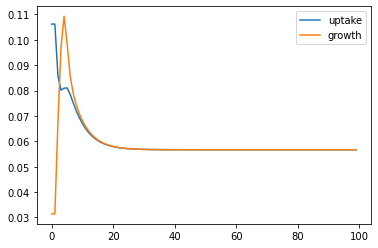

In [357]:
#plt.plot(time, chemostat_out.Growth__uptake_value, label='uptake')

plt.plot(time, chemostat_droop_out.Growth__uptake_value, label='uptake')
plt.plot(time, chemostat_droop_out.Growth__growth_value, label='growth')
plt.legend()

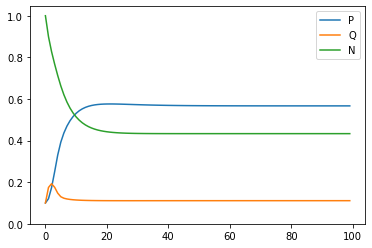

In [359]:
time = chemostat_droop_out.Time__time
plt.plot(time, chemostat_droop_out.Phytoplankton__var_value, label='P')
#
plt.plot(time, chemostat_droop_out.Phytoplankton__quota_value, label='Q')
plt.plot(time, chemostat_droop_out.Nutrient__var_value, label='N')
plt.ylim(bottom=0)
plt.legend()

In [137]:
## now add sinusoidal forcing:
NPDroopChemostat_sinu = NPDroopChemostat.update_processes({'N0':SinusoidalForcing})

with NPDroopChemostat_sinu:
    chemostat_droop_setup_sinu = chemostat_droop_setup.xsimlab.update_vars(input_vars={'N0':{'forcing_label':'N0', 'period':24}})
    chemostat_droop_out_sinu = chemostat_droop_setup_sinu.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component N0
forcing function is in directory: /Users/bpo/Documents/GitHub/phydra/examples
Initializing component Inflow
Initializing component Outflow
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.ODEINTSolver object at 0x164e38a00>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Q'] 
Parameters:['N0_period', 'Inflow_rate', 'Outflow_rate', 'Growth_min_quota', 'Growth_max_quota', 'Growth_halfsat', 'Growth_v_max', 'Growth_mu_max'] 
Forcings:['N0'] 
Fluxes:['Time_time_flux', 'Inflow_input', 'Outflow_decay', 'Growth_uptake', 'Growth_uptake_2_quota', 'Growth_growth_loss', 'Growth_growth'] 
Full Model Dimensions:[('time', None), ('N', None), ('P', None), ('Q', None), ('Time_time_flux', None), ('Inflow_input', None), ('Outflow_decay', 2), ('Growth_uptake', None), ('Growth_uptake_2_quota', None), ('Growth_grow

(0.0, 7.446362013240616)

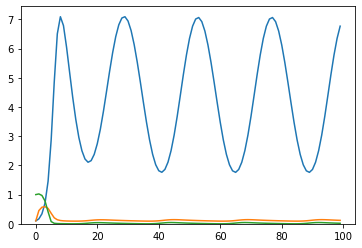

In [47]:
time = chemostat_droop_out_sinu.Time__time
plt.plot(time, chemostat_droop_out_sinu.Phytoplankton__var_value)
plt.plot(time, chemostat_droop_out_sinu.Phytoplankton__quota_value)
plt.plot(time, chemostat_droop_out_sinu.Nutrient__var_value)
plt.ylim(bottom=0)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

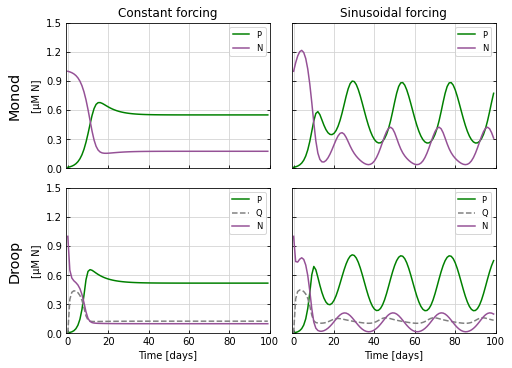

In [57]:
# Pub Plot Draft
%matplotlib inline


culr=['#955196','green','darkorange','brown']

plt.rcParams['figure.figsize'] = [7, 5]

numcols = 2
f1, (ax1, ax2) = plt.subplots(2, numcols, sharex='col', constrained_layout=True)  #, sharey='row')

plt.setp((ax1, ax2))  # , xticks=[1,60,120,180,240,300,365]
from matplotlib.ticker import MaxNLocator
for axe in (ax1, ax2):
    for i in range(numcols):
        
        axe[i].grid(True, color='lightgrey')
        axe[i].get_yaxis().set_major_locator(MaxNLocator(nbins=5))
        axe[i].tick_params(top=False, right=True, direction="in")

time = chemostat_out.Time__time
ax1[0].set_title('Constant forcing')
ax1[0].annotate('Monod',xy=(0, 0.6),rotation=90,xytext=(-30,.75), size='x-large', verticalalignment='center')
ax1[0].plot(time, chemostat_out.Phytoplankton__var_value, label='P', c=culr[1])
ax1[0].plot(time, chemostat_out.Nutrient__var_value, label='N', c=culr[0])
ax1[0].set_ylabel('[µM N]')

time = chemostat_out_sinu.Time__time
ax1[1].set_title('Sinusoidal forcing')
ax1[1].plot(time, chemostat_out_sinu.Phytoplankton__var_value, label='P', c=culr[1])
ax1[1].plot(time, chemostat_out_sinu.Nutrient__var_value, label='N', c=culr[0])

time = chemostat_droop_out.Time__time
ax2[0].annotate('Droop',xy=(0, 0.6),rotation=90,xytext=(-30,.75), size='x-large', verticalalignment='center')
# ax2[0].set_title('Droop - Constant forcing')
ax2[0].plot(time, chemostat_droop_out.Phytoplankton__var_value, label='P', c=culr[1])
ax2[0].plot(time, chemostat_droop_out.Phytoplankton__quota_value, label='Q', linestyle='--', c='grey')
ax2[0].plot(time, chemostat_droop_out.Nutrient__var_value, label='N', c=culr[0])
ax2[0].set_xlabel('Time [days]')
ax2[0].set_ylabel('[µM N]')

time = chemostat_droop_out_sinu.Time__time
# ax2[1].set_title('Sinusoidal forcing')
ax2[1].plot(time, chemostat_droop_out_sinu.Phytoplankton__var_value, label='P', c=culr[1])
ax2[1].plot(time, chemostat_droop_out_sinu.Phytoplankton__quota_value, label='Q', linestyle='--', c='grey')
ax2[1].plot(time, chemostat_droop_out_sinu.Nutrient__var_value, label='N', c=culr[0])
ax2[1].set_xlabel('Time [days]')


# Defining custom 'xlim' and 'ylim' values.
xlim = (-1, 100)

# Setting the values for all axes.
plt.setp((ax1, ax2), xlim=xlim, ylim=(0,1.5))

f1.align_ylabels()

for axe in (ax1, ax2):
    for i in range(numcols):
        axe[i].legend(fontsize='small')

ax1[1].set_yticklabels([])
ax2[1].set_yticklabels([])
        
#plt.tight_layout()

#plt.subplots_adjust(hspace=0.1, wspace=0.1)

#plt.savefig('NP_Chemostat.pdf', bbox_inches='tight')
plt.show()

In [45]:
chemostat_out
chemostat_out_sinu
chemostat_droop_out
chemostat_droop_out_sinu

<xarray.Dataset>
Dimensions:                         (clock: 2, decay_vars: 3, decay_vars_full: 3, input_time: 100, time: 100)
Coordinates:
  * clock                           (clock) int64 0 1
Dimensions without coordinates: decay_vars, decay_vars_full, input_time, time
Data variables:
    Core__solver_type               <U6 'odeint'
    Growth__consumer                <U1 'P'
    Growth__consumer_quota          <U1 'Q'
    Growth__growth_value            (time) float64 0.0002197 0.0002197 ... 0.196
    Growth__halfsat                 float64 0.7
    Growth__max_quota               float64 0.5
    Growth__min_quota               float64 0.1
    Growth__mu_max                  float64 1.0
    Growth__resource                <U1 'N'
    Growth__uptake_value            (time) float64 0.3765 0.3765 ... 0.2049
    Growth__v_max                   float64 1.0
    Inflow__forcing                 <U2 'N0'
    Inflow__input_value             (time) float64 0.1989 0.1989 ... 0.1791
    Inflow__rate                    float64 0.1
    Inflow__var                     <U1 'N'
    N0__forcing_label               <U2 'N0'
    N0__forcing_value               (time) float64 2.0 1.966 ... 1.866 1.707
    N0__period                      int64 24
    N0__value                       float64 1.0
    Nutrient__var_init              float64 1.0
    Nutrient__var_label             <U1 'N'
    Nutrient__var_value             (time) float64 1.0 0.7401 ... 0.2085 0.1986
    Outflow__decay_value            (decay_vars_full, time) float64 0.0826 .....
    Outflow__rate                   float64 0.1
    Outflow__var_list               (decay_vars) <U1 'N' 'P' 'Q'
    PhytoExcretion__decay_value     (time) float64 0.0003616 ... 0.03626
    PhytoExcretion__rate            float64 0.05
    PhytoExcretion__sink            <U1 'N'
    PhytoExcretion__source          <U1 'P'
    PhytoLinMortality__decay_value  (time) float64 0.0003616 ... 0.03626
    PhytoLinMortality__rate         float64 0.05
    PhytoLinMortality__var          <U1 'P'
    Phytoplankton__quota_init       float64 0.001
    Phytoplankton__quota_label      <U1 'Q'
    Phytoplankton__var_init         float64 0.01
    Phytoplankton__var_label        <U1 'P'
    Phytoplankton__var_value        (time) float64 0.01 0.008773 ... 0.7494
    Time__time                      (input_time) int64 0 1 2 3 4 ... 96 97 98 99